# udacity, Data Science Blog Post

## Data Source

the data is taken from https://www.kaggle.com/mchirico/stack-overflow-developer-survey-results-2019

Stack Overflow’s annual Developer Survey is a survey of people who code around the world. Which covers everything from developers’ favorite technologies to their job preferences.

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey_results_public.csv')
print ('shape of data: {}'.format(df.shape))
df.head()

shape of data: (88883, 85)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
schemaDf = pd.read_csv('survey_results_schema.csv')
for i,row in schemaDf.iterrows():
    print ('{}, {} : {}'.format(i, row['Column'], row['QuestionText']))

0, Respondent : Randomized respondent ID number (not in order of survey response time)
1, MainBranch : Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
2, Hobbyist : Do you code as a hobby?
3, OpenSourcer : How often do you contribute to open source?
4, OpenSource : How do you feel about the quality of open source software (OSS)?
5, Employment : Which of the following best describes your current employment status?
6, Country : In which country do you currently reside?
7, Student : Are you currently enrolled in a formal, degree-granting college or university program?
8, EdLevel : Which of the following best describes the highest level of formal education that you’ve completed?
9, UndergradMajor : What was your main or most important field of study?
10, EduOther : Which of the following types of non-degree education have you used or participated in? Please select all that apply.
11, OrgSize : Approximately how many people ar

In [13]:
# what is the unique value for mainbranch
df['MainBranch'].value_counts()/len(df)*100

I am a developer by profession                                                   73.893770
I am a student who is learning to code                                           11.463384
I am not primarily a developer, but I write code sometimes as part of my work     8.481937
I code primarily as a hobby                                                       3.757749
I used to be a developer by profession, but no longer am                          1.782118
Name: MainBranch, dtype: float64

In [59]:
# what is the unique value for Employment
df['Employment'].value_counts()/len(df)*100

Employed full-time                                      72.499803
Independent contractor, freelancer, or self-employed     9.575509
Not employed, but looking for work                       6.300417
Employed part-time                                       5.027958
Not employed, and not looking for work                   4.278658
Retired                                                  0.402777
Name: Employment, dtype: float64

## Q1 Does the full time professional developer in the US, longer working hours means higher pay?

### handle missing value by dropping them

In [81]:
#create dataframe for country == united states, and drop rows that has missing value in any of
#the 3 columns, WorkWeekHrs, MainBranch and ConvertedComp
us_df = df[(df.Country == 'United States')][['WorkWeekHrs', 'MainBranch', 'ConvertedComp', 'Employment', 'YearsCodePro']].dropna()

In [82]:
us_developer_df = us_df[(us_df.MainBranch == 'I am a developer by profession') & (us_df.Employment == 'Employed full-time')]

In [83]:
#check basic statistic for work week hrs
us_developer_df['WorkWeekHrs'].describe()

count    12512.000000
mean        42.209039
std          6.827913
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max        168.000000
Name: WorkWeekHrs, dtype: float64

<Figure size 1224x720 with 0 Axes>

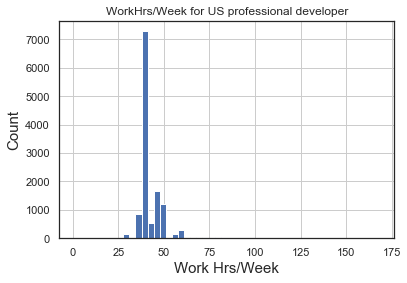

In [84]:
# what is the distribution for workweekhrs
fig=plt.figure(figsize=(17,10));
us_developer_df.hist(column="WorkWeekHrs", bins=50);
plt.xlabel("Work Hrs/Week",fontsize=15);
plt.ylabel("Count",fontsize=15);
plt.title("WorkHrs/Week for US professional developer");

In [85]:
us_developer_df['ConvertedComp'].describe()

count    1.251200e+04
mean     2.554237e+05
std      4.580434e+05
min      0.000000e+00
25%      8.200000e+04
50%      1.140000e+05
75%      1.600000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

<Figure size 7200x720 with 0 Axes>

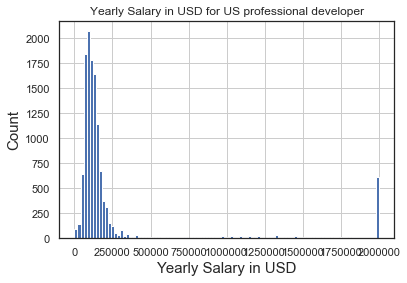

In [86]:
# what is the distribution for workweekhrs
fig=plt.figure(figsize=(100,10));
us_developer_df.hist(column="ConvertedComp", bins=100);
plt.xlabel("Yearly Salary in USD",fontsize=15);
plt.ylabel("Count",fontsize=15);
plt.title("Yearly Salary in USD for US professional developer");

In [87]:
us_developer_df.corr()

,WorkWeekHrs,ConvertedComp
WorkWeekHrs,1.000000,0.048596
ConvertedComp,0.048596,1.000000


Text(0.5, 1.0, 'Work Hour/Week vs Yearly Salary in USD')

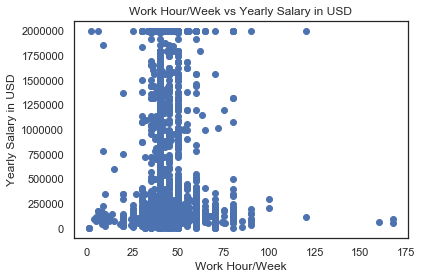

In [88]:
plt.scatter(x = us_developer_df.WorkWeekHrs, y = us_developer_df.ConvertedComp)
plt.xlabel('Work Hour/Week')
plt.ylabel('Yearly Salary in USD')
plt.title('Work Hour/Week vs Yearly Salary in USD')

In [89]:
#what is the statistics for those highly compensated developer, defined as salary > 500000
highly_compensated_df = us_developer_df[us_developer_df['ConvertedComp'] > 500000]
highly_compensated_df.describe()

,WorkWeekHrs,ConvertedComp
count,1151.000000,1.151000e+03
mean,42.862294,1.608635e+06
std,7.393941,4.780373e+05
min,2.000000,5.040000e+05
25%,40.000000,1.176000e+06
50%,40.000000,2.000000e+06
75%,45.000000,2.000000e+06
max,120.000000,2.000000e+06


In [91]:
highly_compensated_df.corr()

,WorkWeekHrs,ConvertedComp
WorkWeekHrs,1.000000,0.042831
ConvertedComp,0.042831,1.000000


Text(0.5, 1.0, 'Work Hour/Week vs Yearly Salary in USD for highly compensated developer')

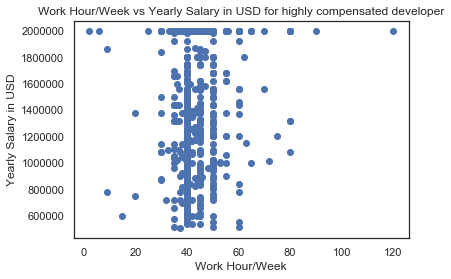

In [90]:
plt.scatter(x = highly_compensated_df.WorkWeekHrs, y = highly_compensated_df.ConvertedComp)
plt.xlabel('Work Hour/Week')
plt.ylabel('Yearly Salary in USD')
plt.title('Work Hour/Week vs Yearly Salary in USD for highly compensated developer')

## the correlation between workweekhrs and yearly salary is only 0.05 which is very weak. Working long Hour doesn't mean higher salary for full time professional Developer, and this is also true for highly compensated developer

## Q2. What is the relationship between working experience and working hour in the US? and does this translates to higher paid for more experienced developer?

Is there a trend showing the work hour per week will increase and then decrease and finally go up again? as developer gain more experience, the responsibility should grow, and then need to spend more time on their work. but as they have other obligations (getting marry, raise kid), they can less afford to spend time on their work and expect the working hour to drop, and then as their kid grown up, they can spend more time with their work and the work hour will increase.

In [96]:
#years coding profession statistics
us_developer_df['YearsCodePro'].unique()

array(['Less than 1 year', '8', '18', '1', '2', '14', '23', '20', '9',
       '5', '10', '48', '4', '11', '12', '6', '3', '7', '15', '16', '22',
       '19', '30', '33', '17', '21', '35', '37', '13', '28', '26', '27',
       '25', '34', '24', '38', '29', '44', '36', '43', '32', '41', '39',
       '42', '31', '50', '40', '45', '47', 'More than 50 years', '49'],
      dtype=object)

In [99]:
def convert_to_year(year):
    y = 1
    if year == 'Less than 1 year':
        y = 1
    elif year == 'More than 50 years':
        y = 50
    else:
        y = int(year)
    return y

#using years code professionally as a proxy to years of experience working professionally
us_developer_df['experience'] = us_developer_df['YearsCodePro'].apply(convert_to_year)

C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


<Figure size 1224x720 with 0 Axes>

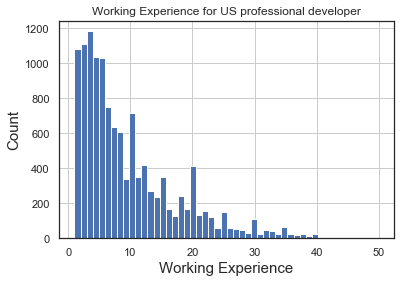

In [100]:
# what is the distribution for workweekhrs
fig=plt.figure(figsize=(17,10));
us_developer_df.hist(column="experience", bins=50);
plt.xlabel("Working Experience",fontsize=15);
plt.ylabel("Count",fontsize=15);
plt.title("Working Experience for US professional developer");
#it appears in us, majority of developer is under 10 years.

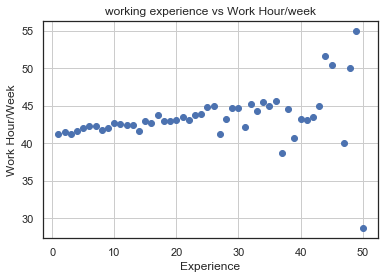

In [112]:
working_hour_distribution = us_developer_df.groupby('experience')['WorkWeekHrs'].mean()
plt.scatter(x = working_hour_distribution.index, y = working_hour_distribution.values)
plt.xlabel('Experience')
plt.ylabel('Work Hour/Week')
plt.title('working experience vs Work Hour/week')
plt.grid()

In [115]:
over_40_comp = us_developer_df[us_developer_df['experience'] > 40].groupby('experience').mean()

In [116]:
over_40_comp

,WorkWeekHrs,ConvertedComp
experience,,
41,43.125000,122737.500000
42,43.571429,105970.857143
43,45.000000,132000.000000
44,51.666667,110000.000000
45,50.500000,142500.000000
47,40.000000,220000.000000
48,50.000000,217333.333333
49,55.000000,176000.000000
50,28.666667,88333.666667


## it appears as developer becomes more experience , their work hour gradually increases, until around 40 years of experience then it suddenly join to higher value. However this doesn't translate to higher compensation

As developer gain more experience, one would expect their responsibility will grow, and need to spend more time on their work. this is consistent with the trend up until 25 years experience and then it seem to plateau. and then it drops slightly and start to jump to a much higher value after 40+ years experience.

assuming on average, one will graduate around 20 years old, 40+ experience will mean the developer is around 60+ years old. And for those developer from 40 to 45 years experience, their total compensation is less than the mean even though they work harder

## Q3, Is any relationship between years of experience coding professional and job switching

we can use lasthiredate as proxy to what time the developer switch job

In [132]:
lasthire = df[(df.Country == 'United States') & (us_df.MainBranch == 'I am a developer by profession') & (us_df.Employment == 'Employed full-time')][['MainBranch', 'Employment', 'YearsCodePro', 'LastHireDate']].dropna()

In [134]:
#filter out I've never had a job , NA - I am an independent contractor or self employed
lasthire = lasthire[~lasthire['LastHireDate'].isin(["I've never had a job", "NA - I am an independent contractor or self employed"])]

In [136]:
lasthire['LastHireDate'].value_counts()

Less than a year ago     3849
1-2 years ago            3381
More than 4 years ago    3005
3-4 years ago            2230
Name: LastHireDate, dtype: int64

In [138]:
lasthire['experience'] = lasthire['YearsCodePro'].apply(convert_to_year)

In [145]:
meanhire = lasthire.groupby('LastHireDate').mean()
order = [ 'Less than a year ago', '1-2 years ago', '3-4 years ago', 'More than 4 years ago']
meanhire.loc[order]

,experience
LastHireDate,
Less than a year ago,6.869057
1-2 years ago,7.580302
3-4 years ago,9.469058
More than 4 years ago,14.279534


Text(0, 0.5, 'experience')

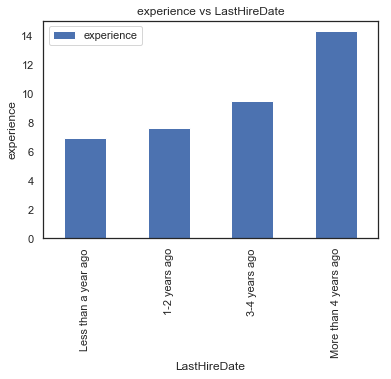

In [150]:
meanhire.loc[order].plot(kind='bar')
plt.title('experience vs LastHireDate')
plt.ylabel('experience')